In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import file from excel format and create a dataframe
df=pd.read_excel("shopify_sneakers.xlsx", index_col="order_id")
df

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56.190022
2,92,925,90,1,cash,2017-03-03 17:38:51.999116
3,44,861,144,1,cash,2017-03-14 04:23:55.594730
4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760
5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536
...,...,...,...,...,...,...
4996,73,993,330,2,debit,2017-03-30 13:47:16.596993
4997,48,789,234,2,cash,2017-03-16 20:36:16.389130
4998,56,867,351,3,cash,2017-03-19 05:42:42.228042


In [3]:
#explore dtypes
df.dtypes

shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [4]:
#Are their many duplicates?
df_dupes=pd.DataFrame.duplicated(df)
df_dupes.value_counts()

False    4995
True        5
dtype: int64

In [5]:
#recreate calculation AOV = 3145.13
(df["order_amount"].sum())/(df["order_amount"].count())

3145.128

In [6]:
#dataframe mean, median, mode
print(df["order_amount"].mean())
print(df["order_amount"].median())
df["order_amount"].mode()

3145.128
284.0


0    153
dtype: int64

In [7]:
#Check the start and end dates to ensure that the whole dataset is within 30 days
print(df["created_at"].min())
df["created_at"].max()

2017-03-01 00:08:09.178666


Timestamp('2017-03-30 23:55:35.408000')

In [8]:
#inspect the order amount column
print(df["order_amount"].min())
df["order_amount"].max()

90


704000

In [9]:
#inspect the order quantity column
print(df["total_items"].min())
df["total_items"].max()

1


2000

In [10]:
#inspect central tendency of units per transaction
print(df["total_items"].mean())
print(df["total_items"].median())
df["total_items"].mode()

8.7872
2.0


0    2
dtype: int64

In [11]:
#find the average shoe cost across all stores
df["avg_item_cost"]=df["order_amount"]/df["total_items"]
df

,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_cost
order_id,,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56.190022,112.0
2,92,925,90,1,cash,2017-03-03 17:38:51.999116,90.0
3,44,861,144,1,cash,2017-03-14 04:23:55.594730,144.0
4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760,156.0
5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536,156.0
...,...,...,...,...,...,...,...
4996,73,993,330,2,debit,2017-03-30 13:47:16.596993,165.0
4997,48,789,234,2,cash,2017-03-16 20:36:16.389130,117.0
4998,56,867,351,3,cash,2017-03-19 05:42:42.228042,117.0


In [12]:
#create a "high spend" dataframe to observe similarities by $ amount
high_spend_df=df.loc[df["order_amount"]>=1000]
print(high_spend_df.count())
high_spend_df

shop_id           71
user_id           71
order_amount      71
total_items       71
payment_method    71
created_at        71
avg_item_cost     71
dtype: int64


,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_cost
order_id,,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000000,352.0
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000000,352.0
161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834413,25725.0
491,78,936,51450,2,debit,2017-03-26 17:08:18.911213,25725.0
494,78,983,51450,2,cash,2017-03-16 21:39:35.399765,25725.0
...,...,...,...,...,...,...,...
4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000000,352.0
4716,78,818,77175,3,debit,2017-03-05 05:10:43.633026,25725.0
4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00.000000,352.0


In [13]:
#create a "high totals" dataframe to observe similarities by unit -- Matches high_spend
high_totals_df=df.loc[df["total_items"]>=10]
print(high_totals_df.count())
high_totals_df

shop_id           17
user_id           17
order_amount      17
total_items       17
payment_method    17
created_at        17
avg_item_cost     17
dtype: int64


,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_cost
order_id,,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0


In [14]:
#create a store 42 dataframe to investigate the trends at that store.
store_42_df=df.loc[df["shop_id"]==42]
print((store_42_df).count())
print(store_42_df["order_amount"].mean())
print(store_42_df["order_amount"].median())
print(store_42_df["order_amount"].mode())
store_42_df

shop_id           51
user_id           51
order_amount      51
total_items       51
payment_method    51
created_at        51
avg_item_cost     51
dtype: int64
235101.49019607843
704.0
0    704000
dtype: int64


,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_cost
order_id,,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000000,352.0
41,42,793,352,1,credit_card,2017-03-24 14:15:40.648596,352.0
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000000,352.0
309,42,770,352,1,credit_card,2017-03-11 18:14:38.774201,352.0
410,42,904,704,2,credit_card,2017-03-04 14:32:57.620532,352.0
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000000,352.0
835,42,792,352,1,cash,2017-03-25 21:31:24.595774,352.0
836,42,819,704,2,cash,2017-03-09 14:15:15.135510,352.0
939,42,808,1056,3,credit_card,2017-03-13 23:43:45.329731,352.0


In [15]:
#create a store 78 dataframe to investigate the trends at that store.
store_78_df=df.loc[df["shop_id"]==78]
print((store_78_df).count())
print(store_78_df["order_amount"].mean())
print(store_78_df["order_amount"].median())
print(store_78_df["order_amount"].mode())
store_78_df

shop_id           46
user_id           46
order_amount      46
total_items       46
payment_method    46
created_at        46
avg_item_cost     46
dtype: int64
49213.04347826087
51450.0
0    25725
dtype: int64


,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_item_cost
order_id,,,,,,,
161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834413,25725.0
491,78,936,51450,2,debit,2017-03-26 17:08:18.911213,25725.0
494,78,983,51450,2,cash,2017-03-16 21:39:35.399765,25725.0
512,78,967,51450,2,cash,2017-03-09 07:23:13.640290,25725.0
618,78,760,51450,2,cash,2017-03-18 11:18:41.848103,25725.0
692,78,878,154350,6,debit,2017-03-27 22:51:43.202894,25725.0
1057,78,800,25725,1,debit,2017-03-15 10:16:44.830420,25725.0
1194,78,944,25725,1,debit,2017-03-16 16:38:25.551298,25725.0
1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438105,25725.0


In [16]:
#examine the average item cost and order amount per store
pd.set_option('display.max_rows', 100)
avg_df=df.groupby(['shop_id']).mean().drop("user_id", axis=1)
avg_df

,order_amount,total_items,avg_item_cost
shop_id,,,
1,308.818182,1.954545,158.0
2,174.327273,1.854545,94.0
3,305.250000,2.062500,148.0
4,258.509804,2.019608,128.0
5,290.311111,2.044444,142.0
6,383.508475,2.050847,187.0
7,218.000000,1.946429,112.0
8,241.043478,1.826087,132.0
9,234.000000,1.983051,118.0


<Figure size 432x288 with 0 Axes>

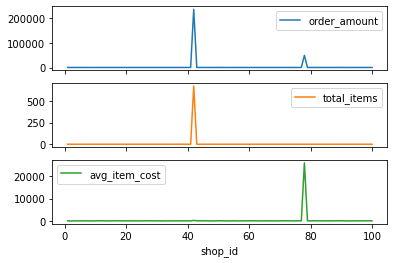

In [17]:
plt.figure()
avg_df.plot(subplots=True)
plt.legend(loc='best')



In [18]:
avg_df.to_csv("AOV_Shop_data.csv")